<a href="https://colab.research.google.com/github/LouisKimDev/MobilityVisionSystem/blob/main/MVS_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

img_1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW5/view1.png")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW5/view5.png")
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

1. Middelbury stereo dataset에서 원하는 데이터 1쌍을 고르시오

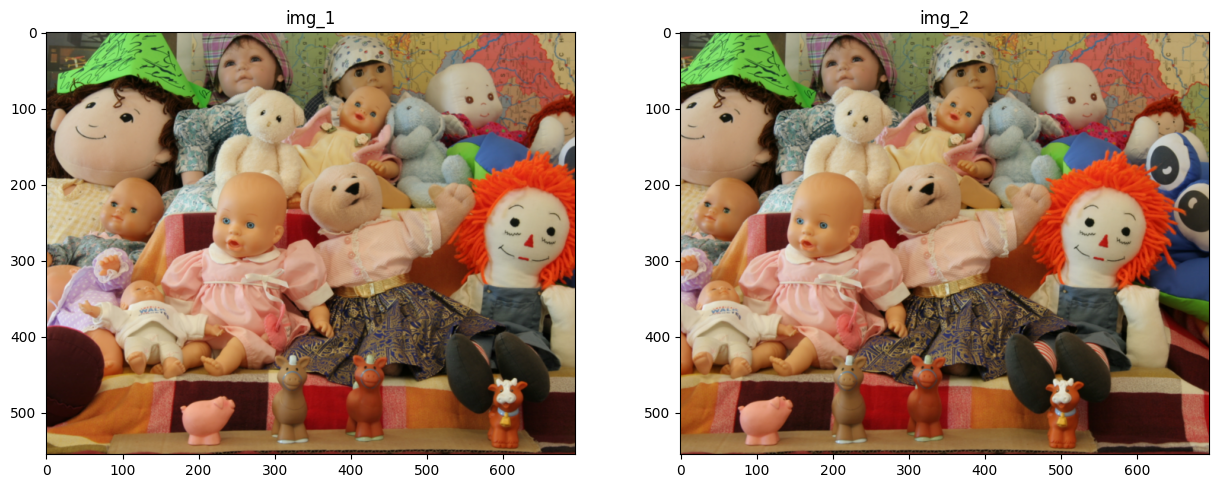

In [3]:
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.title("img_1")
plt.imshow(img_1)

plt.subplot(1,2,2)
plt.title("img_2")
plt.imshow(img_2)
plt.show()

2. 좌/우 이미지로부터 특징점을 추출하시오 (아래 3가지 방법)

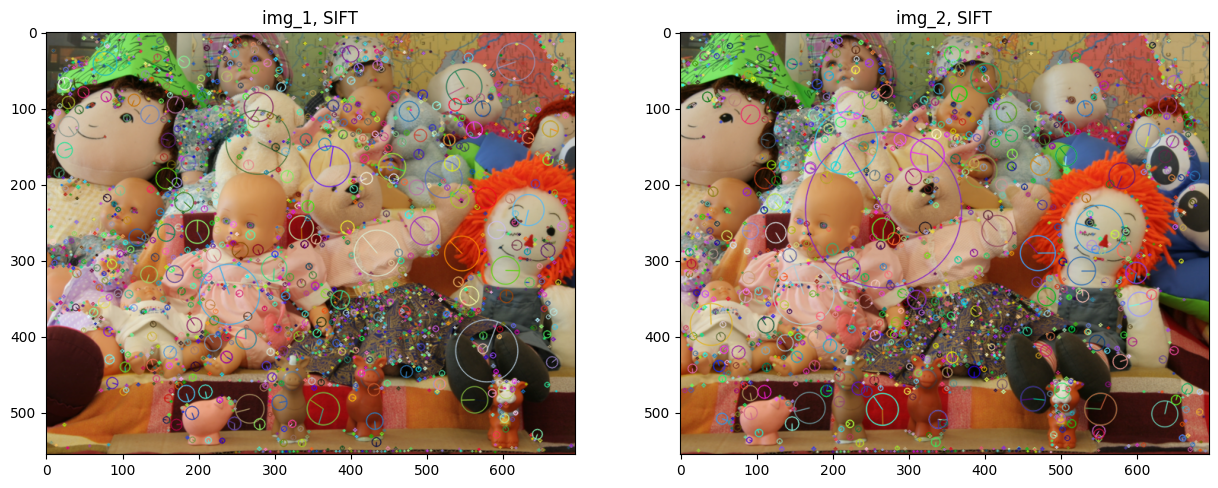

In [4]:
# 2.1) SIFT로 특징점 추출

# SIFT 추출기 생성
sift = cv2.xfeatures2d.SIFT_create()

# 키 포인트 검출과 서술자 계산
keypoint1_SIFT, descriptor1_SIFT = sift.detectAndCompute(gray_1, None)
keypoint2_SIFT, descriptor2_SIFT = sift.detectAndCompute(gray_2, None)

# 키 포인트 그리기
img_draw_1 = cv2.drawKeypoints(img_1, keypoint1_SIFT, None, \
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_draw_2 = cv2.drawKeypoints(img_2, keypoint2_SIFT, None, \
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.title("img_1, SIFT")
plt.imshow(img_draw_1)
plt.subplot(1,2,2)
plt.title("img_2, SIFT")
plt.imshow(img_draw_2)
plt.show()

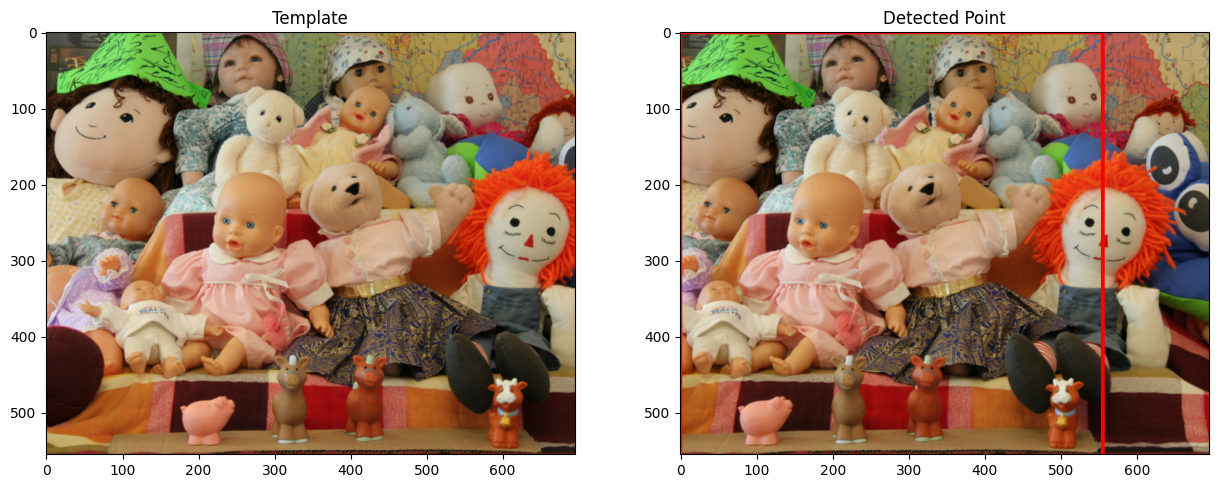

In [33]:
# 3.1) SIFT 사용 후 template 기반 매칭

img = img_2
img2 = img.copy()
template = img_1

w, h = template.shape[:2]

# Apply template Matching
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = min_loc

bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img,(top_left), bottom_right, 255, 3)

plt.figure(figsize=(15,20))
plt.subplot(121),plt.imshow(template,cmap = 'gray')
plt.title('Template')
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point')
plt.show()

In [47]:
img_1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW5/view1.png")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW5/view5.png")
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

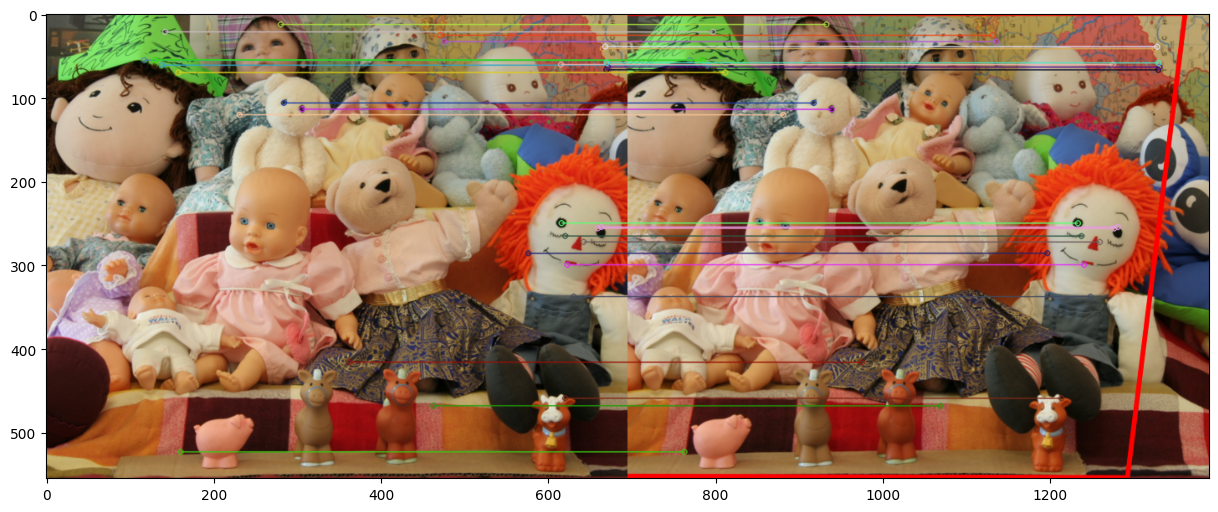

In [49]:
# 3.4) SIFT 사용 후 RANSAC 기반 매칭
# 추출된 이미지를 RANSAC 알고리즘을 통해 매칭시킨다.
matcher = cv2.BFMatcher_create()
matches = matcher.match(descriptor1_SIFT, descriptor2_SIFT)

# 좋은 매칭 결과 선별
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:30]

# 좋은 매칭점의 queryIdx로 원본 영상의 좌표 구하기
src_pts = np.float32([ keypoint1_SIFT[m.queryIdx].pt for m in good_matches ])
# 좋은 매칭점의 trainIdx로 대상 영상의 좌표 구하기
dst_pts = np.float32([ keypoint2_SIFT[m.trainIdx].pt for m in good_matches ])

# 원근 변환 행렬 구하기 -> 원본영상의 좌표와 대상 영상의 좌표에서 mtrx와 mask 호모그래피 획득
# mtrx는 3x3행렬이다.
mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
# 원본 영상 크기로 변환 영역 좌표 생성
h, w = gray_1.shape[:2] # 영상 너비와 높이 구함 -> 480 * 720
pts = np.float32([ [[0,0]], [[0,h-1]], [[w-1,h-1]], [[w-1,0]] ])

# 원본 영상 좌표를 원근 변환
dst = cv2.perspectiveTransform(pts, mtrx)
# 변환 좌표 영역을 대상 영상에 그리기
img_3_SIFT = cv2.polylines(img_2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

# 좋은 매칭 그려서 출력
res_SIFT_RANSAC = cv2.drawMatches(img_1, keypoint1_SIFT, img_3_SIFT, keypoint2_SIFT, good_matches, None, \
                      flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,20))
plt.imshow(res_SIFT_RANSAC)

In [7]:
img_1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW5/view1.png")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW5/view5.png")
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

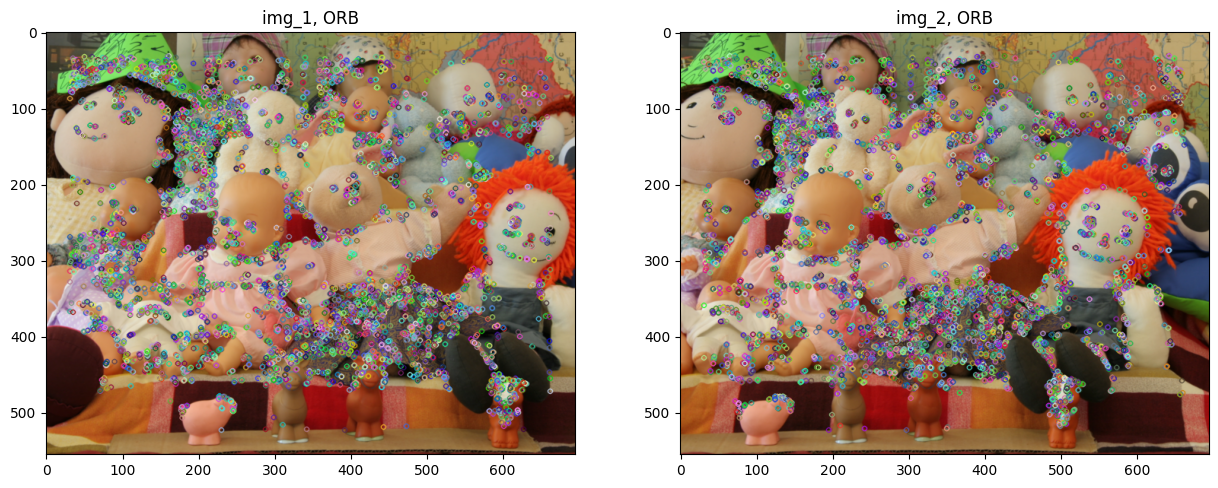

In [8]:
# 2.3) ORB 사용하여 특징점 추출

# orb 추출기 생성
orb = cv2.ORB_create(
    nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,
)

# 키포인트 검출과 서술자 계산
keypoint1_ORB, descriptor1_ORB = orb.detectAndCompute(img_1, None)
keypoint2_ORB, descriptor2_ORB = orb.detectAndCompute(img_2, None)

# 키 포인트 그리기
img_draw_1 = cv2.drawKeypoints(img_1, keypoint1_ORB, None)
img_draw_2 = cv2.drawKeypoints(img_2, keypoint2_ORB, None)

plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.title("img_1, ORB")
plt.imshow(img_draw_1)
plt.subplot(1,2,2)
plt.title("img_2, ORB")
plt.imshow(img_draw_2)
plt.show()


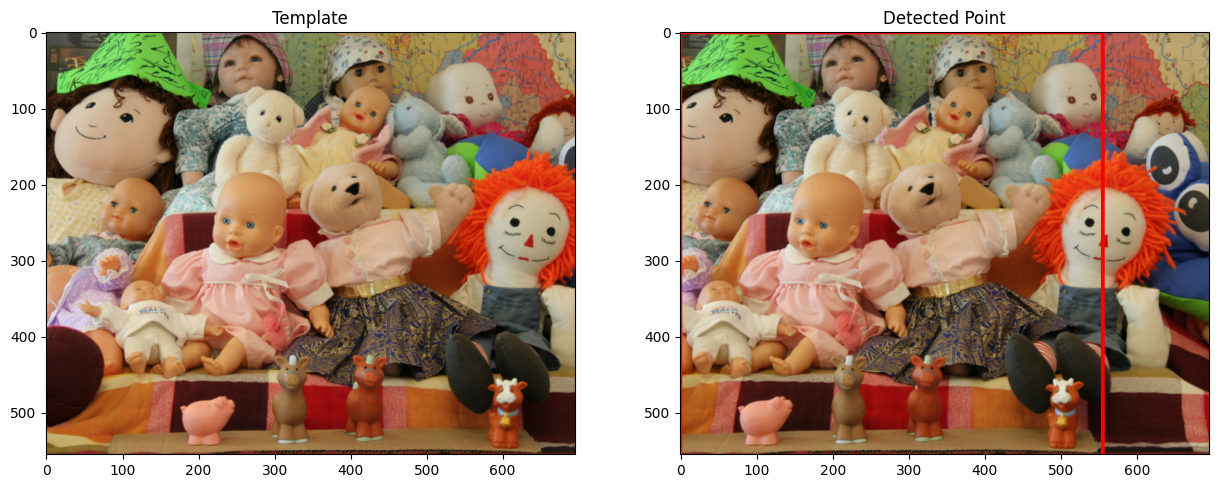

In [34]:
# 3.3) ORB사용 후 Template 기반 매칭

img = img_2
img2 = img.copy()
template = img_1

w, h = template.shape[:2]

# Apply template Matching
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = min_loc

bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img,(top_left), bottom_right, 255, 3)

plt.figure(figsize=(15,20))
plt.subplot(121),plt.imshow(template,cmap = 'gray')
plt.title('Template')
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point')
plt.show()

[[ 1.05870522e+00 -3.04897340e-02 -4.65962899e+01]
 [ 2.33385401e-02  1.02170533e+00 -2.95371187e+00]
 [ 1.38000890e-04  2.98502680e-05  1.00000000e+00]]


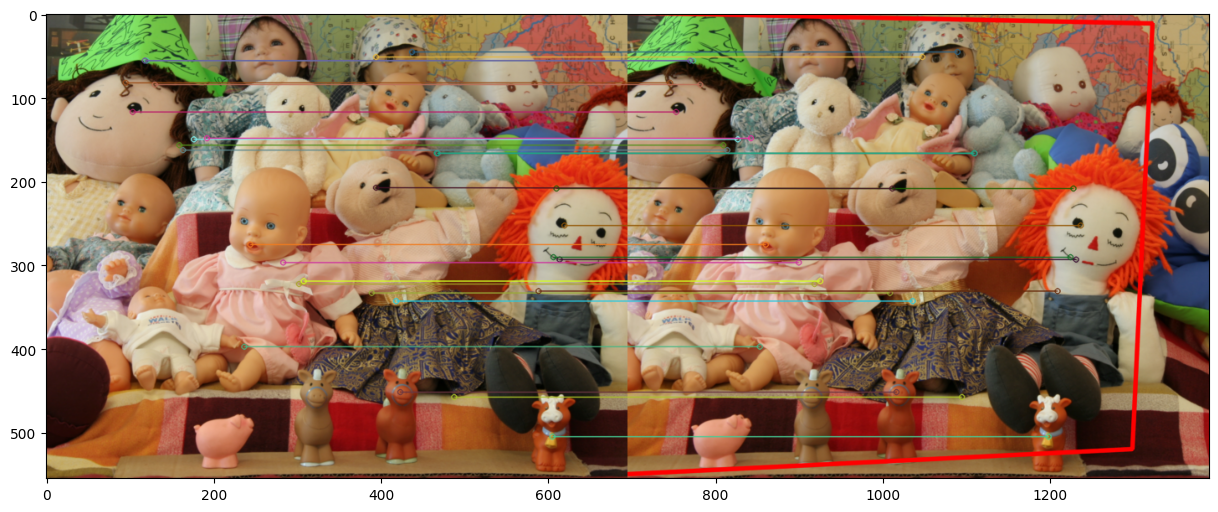

In [10]:
# 3.6) ORB사용 후 RANSAC 기반 매칭

# 추출된 이미지를 RANSAC 알고리즘을 통해 매칭시킨다.
matcher = cv2.BFMatcher_create()
matches = matcher.match(descriptor1_ORB, descriptor2_ORB)

# 좋은 매칭 결과 선별
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:30]

# 좋은 매칭점의 queryIdx로 원본 영상의 좌표 구하기
src_pts = np.float32([ keypoint1_ORB[m.queryIdx].pt for m in good_matches ])
# 좋은 매칭점의 trainIdx로 대상 영상의 좌표 구하기
dst_pts = np.float32([ keypoint2_ORB[m.trainIdx].pt for m in good_matches ])
# 원근 변환 행렬 구하기 -> 원본영상의 좌표와 대상 영상의 좌표에서 mtrx와 mask 호모그래피 획득
# mtrx는 3x3행렬이다.
mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
# 원본 영상 크기로 변환 영역 좌표 생성
h, w = gray_1.shape[:2] # 영상 너비와 높이 구함 -> 480 * 720
pts = np.float32([ [[0,0]], [[0,h-1]], [[w-1,h-1]], [[w-1,0]] ])
# 원본 영상 좌표를 원근 변환
dst = cv2.perspectiveTransform(pts, mtrx)
# 변환 좌표 영역을 대상 영상에 그리기
img_3_ORB = cv2.polylines(img_2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

# 좋은 매칭 그려서 출력
res_ORB_RANSAC = cv2.drawMatches(img_1, keypoint1_ORB, img_3_ORB, keypoint2_ORB, good_matches, None, \
                      flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,20))
plt.imshow(res_ORB_RANSAC)
print(mtrx)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


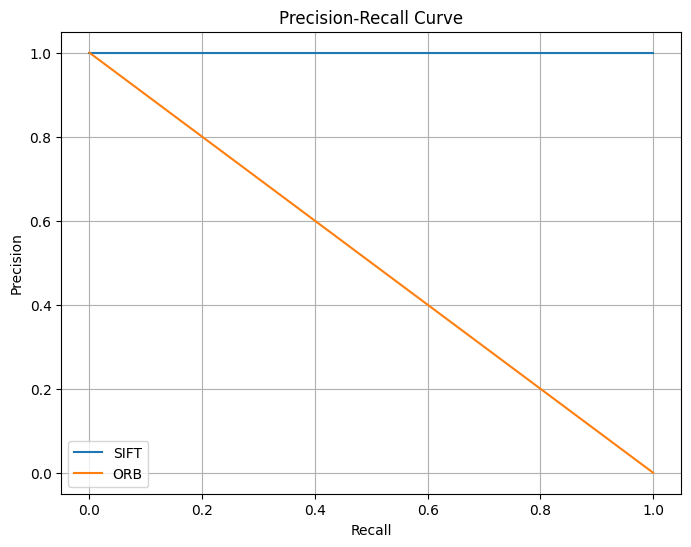

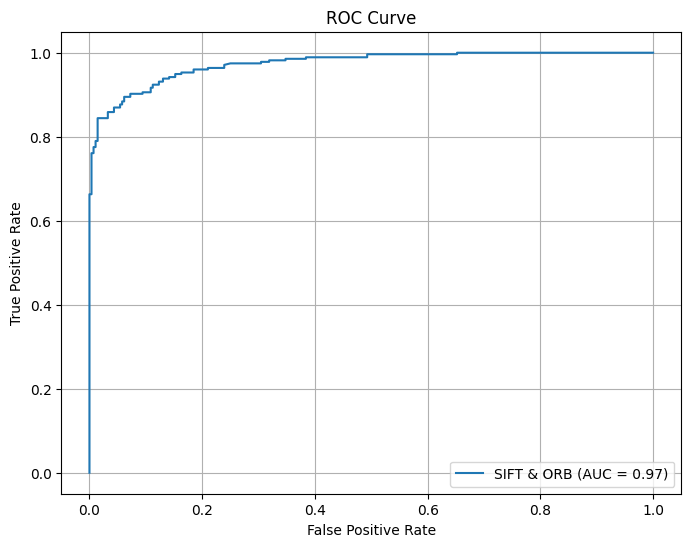

In [46]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def calculate_precision_recall(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return precision, recall

def calculate_roc(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

def plot_precision_recall(precision, recall, method_name):
    plt.plot(recall, precision, label=method_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')

def plot_roc(fpr, tpr, roc_auc, method_name):
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(method_name, roc_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

# 템플릿, 타겟 이미지 불러오기
template_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW5/view1.png")
target_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/HW5/view5.png")

# SIFT 디텍터 초기화
sift = cv2.SIFT_create()

# ORB 초기화
orb = cv2.ORB_create()

# SIFT로 템플릿 이미지에서 kp, des 찾기
kp1_sift, des1_sift = sift.detectAndCompute(template_image, None)

# ORB로 템플릿 이미지에서 kp, des 찾기
kp1_orb, des1_orb = orb.detectAndCompute(template_image, None)

# SIFT로 타겟 이미지에서 kp, des 찾기
kp2_sift, des2_sift = sift.detectAndCompute(target_image, None)

# ORB로 타겟 이미지에서 kp, des 찾기
kp2_orb, des2_orb = orb.detectAndCompute(target_image, None)

# Create a brute force matcher for SIFT
bf_sift = cv2.BFMatcher()

# Match descriptors for SIFT
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

# Apply ratio test to filter good matches for SIFT
good_matches_sift = []
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_matches_sift.append(m)

# Create a brute force matcher for ORB
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors for ORB
matches_orb = bf_orb.match(des1_orb, des2_orb)

# Sort matches by distance for ORB
matches_orb = sorted(matches_orb, key=lambda x: x.distance)



# Set ground truth labels (1 for true matches, 0 for false matches)
y_true_sift = np.ones(len(good_matches_sift))
y_true_orb = np.zeros(len(matches_orb))

# Set match scores (larger distance implies lower confidence)
y_scores_sift = np.array([m.distance for m in good_matches_sift])
y_scores_orb = np.array([m.distance for m in matches_orb])

# Calculate minimum number of matches required for RANSAC
min_match_count = min(len(good_matches_sift), len(matches_orb))

# Truncate the scores and labels to the minimum match count
y_true_sift = y_true_sift[:min_match_count]
y_true_orb = y_true_orb[:min_match_count]
y_scores_sift = y_scores_sift[:min_match_count]
y_scores_orb = y_scores_orb[:min_match_count]

# Calculate precision and recall for SIFT
precision_sift, recall_sift = calculate_precision_recall(y_true_sift, y_scores_sift)

# Calculate precision and recall for ORB
precision_orb, recall_orb = calculate_precision_recall(y_true_orb, y_scores_orb)

# Calculate ROC curve for SIFT and ORB
fpr, tpr, roc_auc = calculate_roc(np.concatenate((y_true_sift, y_true_orb)), np.concatenate((y_scores_sift, y_scores_orb)))

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plot_precision_recall(precision_sift, recall_sift, 'SIFT')
plot_precision_recall(precision_orb, recall_orb, 'ORB')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plot_roc(fpr, tpr, roc_auc, 'SIFT & ORB')
plt.title('ROC Curve')
plt.grid(True)
plt.show()